### Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep

import requests
from bs4 import BeautifulSoup

headers = {
    'Host': 'www.barnesandnoble.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:70.0) Gecko/20100101 Firefox/70.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'TE': 'Trailers'
}

alls = []

for k in range(1,5):

  URL = "https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8?Nrpp=20&page="+str(k)
  page = requests.get(URL, headers=headers)
  soup = BeautifulSoup(page.content, "html.parser")
  results = soup.find(id="listView")

  for n,_ in enumerate(results.find_all("h3", class_="product-info-title")):

    all = []

    try:

      title = results.find_all("h3", class_="product-info-title")[n].text.split("(")[0][1:-1]
      year = results.find_all("h3", class_="product-info-title")[n].text.split("(")[-1][6:-2]
      author = results.find_all("div", class_="product-shelf-author")[n].text.strip()[3:]
      price = results.find_all("span", class_="sr-only")[n].text.split(",")[0][-5:]
      book_cover = results.find_all("a", class_="format")[n].text

      all.append(title)
      all.append(year)
      all.append(author)
      all.append(price)
      all.append(book_cover)

    except:
      print("--------------------------",n,"-------------------------")

    alls.append(all)

In [ ]:
df = pd.DataFrame(alls,columns=['Book Name','Year','Author','Price', 'Book_cover'])
df.to_csv('barnes&noble_products.csv', index=False, encoding='utf-8')

### Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/Portfolio/Books and Wings/Data/barnes&noble_products.csv")
print(len(df))

In [ ]:
df_book = df.copy()
df_book = df_book.dropna()

In [ ]:
print(len(df_book))
df_book

80


,Book Name,Year,Author,Price,Book_cover
0,"Heartstopper, Volume 2",2020,Alice Oseman,12.99,Paperback
1,"Heartstopper, Volume 1",2020,Alice Oseman,12.99,Paperback
2,The Mothers and Daughters of the Bible Speak: ...,2022,Shannon Bream,19.99,Hardcover
3,Book Lovers,2022,Emily Henry,14.99,Paperback
4,Knight Owl,2022,Christopher Denise,14.99,Hardcover
...,...,...,...,...,...
75,Shatter Me,2018,Tahereh Mafi,10.49,Paperback
76,The Flames of Hope,2022,Tui T. Sutherland,14.99,Hardcover
77,The Alice Network,2017,Kate Quinn,13.99,Paperback
78,"Because of You, Mom",2021,"Kobi Yamada, Natalie Russell (Illustrator)",$8.99,Hardcover


In [ ]:
df_book['Price'] = df_book['Price'].str.replace(r'$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df_book["Price"] = pd.to_numeric(df_book["Price"])

In [ ]:
df_book.to_csv('barnes&noble_products_cleaning.csv', index=False, encoding='utf-8')

### Data Analysis

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df_book = pd.read_csv("/content/drive/MyDrive/DS/Portfolio/Books and Wings/Data/barnes&noble_products_cleaning.csv")

In [3]:
df_book.head()

,Book Name,Year,Author,Price,Book_cover
0,"Heartstopper, Volume 2",2020,Alice Oseman,12.99,Paperback
1,"Heartstopper, Volume 1",2020,Alice Oseman,12.99,Paperback
2,The Mothers and Daughters of the Bible Speak: ...,2022,Shannon Bream,19.99,Hardcover
3,Book Lovers,2022,Emily Henry,14.99,Paperback
4,Knight Owl,2022,Christopher Denise,14.99,Hardcover


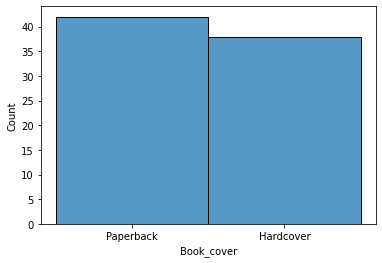

In [4]:
sns.histplot(data=df_book, x="Book_cover")

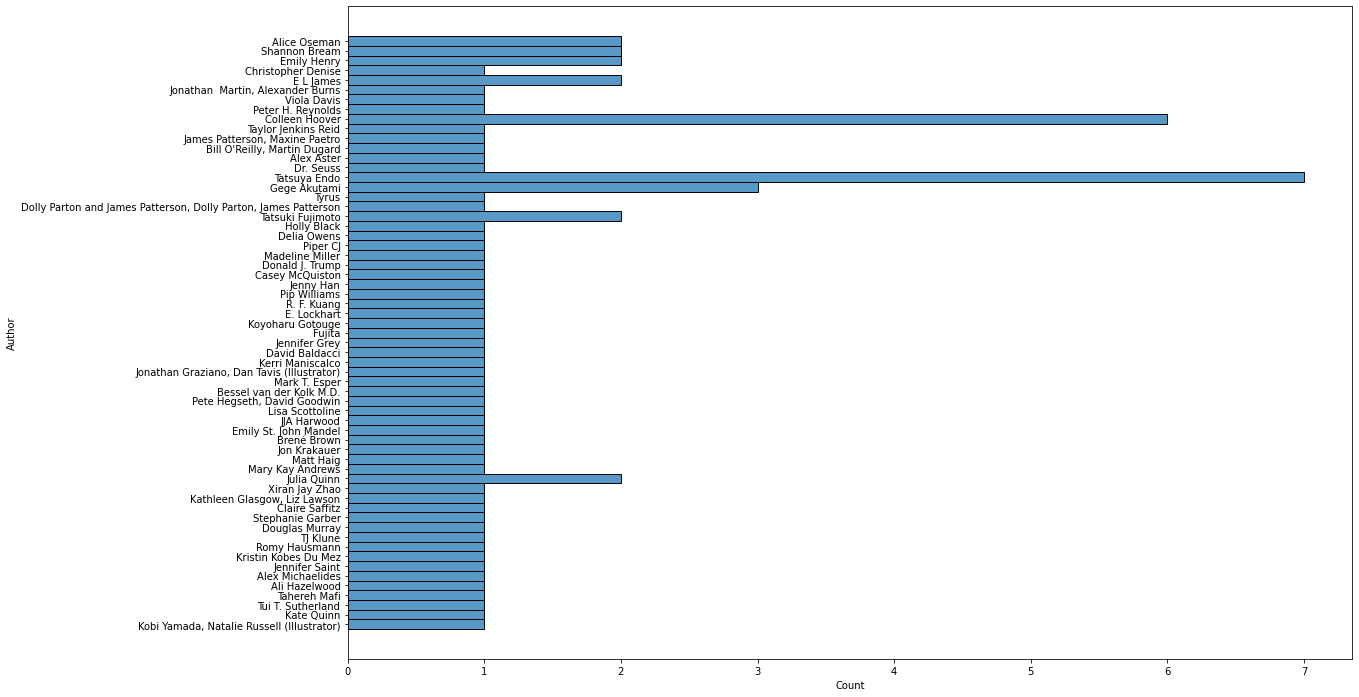

In [7]:
plt.figure(figsize=(18,12))
sns.histplot(data=df_book, y="Author")

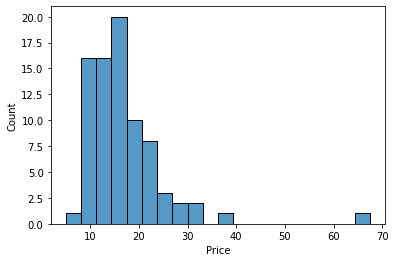

In [8]:
sns.histplot(data=df_book, x="Price")

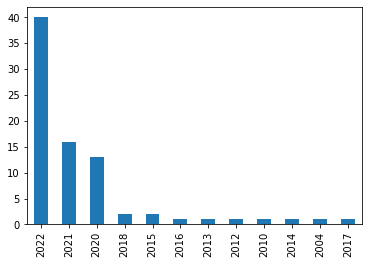

In [10]:
df_book['Year'].value_counts().plot.bar()